# Spare-it Segmentation EDA: Images and Labels

This notebook contains an analysis of the Spare-it segmentation dataset.

In [1]:
import os
import json
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

We will start by determining the number of annotated images that we have in the dataset. If you are running this code locally (i.e. not on the SCC), you will need to change the file paths to your images and labels. 

In [2]:
# print number of json files
folder_path = '/projectnb/ds549/students/ac25/cocojson'
files = os.listdir(folder_path)
json_files = [file for file in files if file.endswith('.json')]
print(f"Number of .json files in the folder: {len(json_files)}")

# print number of image files
folder_path = '/projectnb/ds549/students/ac25/images'
files = os.listdir(folder_path)
image_extensions = ['.jpg', '.jpeg', '.png', '.gif'] # .jpeg.icloud and .icloud file extension should be changed to regular jpeg
image_files = [file for file in files if any(file.endswith(ext) for ext in image_extensions)]
print(f"Number of image files in the folder: {len(image_files)}")

Number of .json files in the folder: 18169
Number of image files in the folder: 18169


We will now assess the quality of our dataset labels and identify any places where the category convention in the dataset disagrees with our ground truth category convention. We will check for (1) categories with different names, (2) unexpected categories, and (3) missing categories. These are defined as follows: 

- Categories with different names: An annotation where the category id matches the category id in the answer key (ground truth) but the name of the category is different from our convention. 
- Unexpected categories: An annotation where the category id does not exist in our convention. 
- Missing categories: A category id in our convention which does not exist in the dataset.


In [4]:
answer_key = {
    1: "Paper Cup", 2: "Snack or Candy Bag or Wrapper", 4: "Wipe", 5: "Wax Paper",
    6: "Latex Gloves", 7: "Juice or Other Pouch", 8: "Diaper", 9: "Padded Envelope (mixed materials)",
    10: "Blister Pack", 11: "Pens and Pencils", 14: "Miscellaneous Office Supplies",
    15: "Facemask and Other PPE", 16: "Shelf Stable Carton", 17: "Soiled Plastic", 18: "Soiled Metal",
    19: "Soiled Glass", 20: "Compostable Fiber Ware", 21: "Compostable Cutlery",
    22: "Compostable Plastic Cups", 23: "Compostable Paper Cups",
    24: "Paper Towel/Napkins/Tissue/Tissue Paper", 25: "Wooden Coffee Stirrer or Utensil or Chopstick",
    26: "Soiled Cardboard Box", 27: "Compostable Plastic Lid", 30: "Food Soiled Paper",
    36: "Plastic strapping", 38: "Batteries", 40: "Cables", 43: "Computers", 44: "Monitors",
    45: "Toner and Ink Cartridges", 46: "Miscellaneous Electronics", 47: "LED Lightbulb",
    48: "Meat and Fish", 49: "Bones and Shells", 50: "Cheese and Other Fats", 51: "Fruits And Veggies",
    52: "Other Food or Mixed Food", 53: "Breads", 54: "Grains", 55: "Tea Bags",
    56: "Coffee Grounds & Filters", 57: "Egg Shell", 58: "Glass Bottles", 59: "Glass Jars",
    60: "Broken Glass", 63: "Metal Can", 65: "Aluminum Foil", 66: "Aluminum Catering Tray",
    67: "Other Clean Metal", 68: "Aerosol Can", 69: "Metallic Bottle Cap or Lid",
    70: "Metal Strapping", 72: "Liquids", 73: "Leaves, Flowers, Grass Clippings",
    76: "Office Paper", 77: "Shredded Paper", 78: "Clean Cardboard",
    79: "Refrigerated Beverage Carton", 80: "Magazines Newspaper", 82: "Receipts and Thermal Paper",
    83: "Empty Paper Bag", 84: "Cardboard Coffee Cup Sleeve", 85: "Clean Paper Plate",
    86: "Colored Memo Note", 87: "Office Folder", 88: "Paper Roll", 89: "Plastic Drink Bottle",
    91: "Plastic Milk Jug or Personal Care Bottle", 92: "Clean Plastic Film",
    93: "Yogurt Tub or Container", 94: "Expanded Polystyrene (styrofoam)",
    95: "Other Clean Plastics (rigid)", 96: "Plastic Straws", 97: "Clear Clamshell Container",
    98: "Plastic Cutlery", 99: "Plastic Lid except black", 100: "Plastic Coffee Stirrer",
    101: "Clear Plastic Cup", 102: "Colored Plastic Cup", 103: "Black Plastic",
    107: "Bubble Wrap", 109: "Incandescent Lightbulbs", 110: "CFL Lightbulbs",
    112: "Textiles and Clothes", 114: "Unclassifiable", 115: "Ceramics", 116: "Filled Bag",
    117: "Coffee Pod", 118: "Wrapping Paper", 119: "Other Clean Paper", 120: "Other Clean Glass",
    121: "Drinking glass or glass ovenware", 122: "Other Trash",
    123: "Flexible container lid / seal", 124: "Snack Food Canister",
    125: "Other compostable material", 126: "Sandwich paper wrapper", 127: "Hard Cover Books",
    128: "Small Paper Packets", 129: "Paper Straw", 130: "Plastic pump", 131: "Foodshare"
}

def analyze_coco_json(directory):
    different_names = defaultdict(set)
    unexpected_categories = defaultdict(set)
    missing_categories = set(answer_key.keys())
    
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            with open(os.path.join(directory, filename), 'r') as f:
                data = json.load(f)
                
                for category in data['categories']:
                    cat_id = category['id']
                    cat_name = category['name']
                    
                    if cat_id in answer_key:
                        if cat_name != answer_key[cat_id]:
                            different_names[cat_id].add(cat_name)
                        missing_categories.discard(cat_id)
                    else:
                        unexpected_categories[cat_id].add(cat_name)

    print("Categories with different names:")
    for cat_id, names in different_names.items():
        print(f"ID: {cat_id}")
        print(f"  Answer key name: {answer_key[cat_id]}")
        print(f"  Found names: {', '.join(names)}")
        print()

    print("Unexpected categories:")
    for cat_id, names in unexpected_categories.items():
        print(f"ID: {cat_id}")
        print(f"  Found names: {', '.join(names)}")
        print()

    print("Missing categories:")
    for cat_id in missing_categories:
        print(f"ID: {cat_id}, Name: {answer_key[cat_id]}")

directory = '/projectnb/ds549/students/ac25/cocojson'
analyze_coco_json(directory)

Categories with different names:
ID: 2
  Answer key name: Snack or Candy Bag or Wrapper
  Found names: Snack or Candy Bag or Wrapper 

ID: 46
  Answer key name: Miscellaneous Electronics
  Found names: Miscellaneous Electronics 

ID: 24
  Answer key name: Paper Towel/Napkins/Tissue/Tissue Paper
  Found names: Paper Towel/Napkins/Tissue

ID: 25
  Answer key name: Wooden Coffee Stirrer or Utensil or Chopstick
  Found names: Wooden Coffee Stirrer or Chopstick

ID: 56
  Answer key name: Coffee Grounds & Filters
  Found names: Coffee Grounds

ID: 92
  Answer key name: Clean Plastic Film
  Found names: Clean Plastic film, Empty Plastic Bag

ID: 96
  Answer key name: Plastic Straws
  Found names: Straws

ID: 124
  Answer key name: Snack Food Canister
  Found names: Food Canister, Food canister

ID: 99
  Answer key name: Plastic Lid except black
  Found names: Plastic Lid , Plastic Lid

ID: 126
  Answer key name: Sandwich paper wrapper
  Found names: Paper Wrapper

ID: 103
  Answer key name: B

We will need to be aware of these differences between the dataset labeling convention and the convention that we will use. For categories with different names, we see that there are minor differences, but we may be able to still treat them the same based on their matching category id. For unexpected categories (plastic wrap), we can discard these categories since they are not part of our convention. For missing categories (Foodshare), we will have to discard these categories since there is no easy way to identify instances of this in our dataset.

Based on this analysis, we can now define an id to index mapping that we can use for training.

In [5]:
id_to_index = {1: 0, 2: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7, 10: 8, 11: 9, 14: 10, 15: 11, 16: 12, 
               17: 13, 18: 14, 19: 15, 20: 16, 21: 17, 22: 18, 23: 19, 24: 20, 25: 21, 26: 22, 27: 23, 
               30: 24, 36: 25, 38: 26, 40: 27, 43: 28, 44: 29, 45: 30, 46: 31, 47: 32, 48: 33, 49: 34, 
               50: 35, 51: 36, 52: 37, 53: 38, 54: 39, 55: 40, 56: 41, 57: 42, 58: 43, 59: 44, 60: 45, 
               63: 46, 65: 47, 66: 48, 67: 49, 68: 50, 69: 51, 70: 52, 72: 53, 73: 54, 76: 55, 77: 56, 
               78: 57, 79: 58, 80: 59, 82: 60, 83: 61, 84: 62, 85: 63, 86: 64, 87: 65, 88: 66, 89: 67, 
               91: 68, 92: 69, 106: 69, 93: 70, 94: 71, 95: 72, 96: 73, 97: 74, 98: 75, 99: 76, 100: 77, 101: 78, 
               102: 79, 103: 80, 107: 81, 109: 82, 110: 83, 112: 84, 114: 85, 115: 86, 116: 87, 
               117: 88, 118: 89, 119: 90, 120: 91, 121: 92, 122: 93, 123: 94, 124: 95, 125: 96, 126: 97, 
               127: 98, 128: 99, 129: 100, 130: 101} # 92 Clean Plastic Film, 106 Plastic Wrap - Class Merge, 131 - No Foodshare

Now we will plot the number of instances of each category in the dataset. We have also been asked this semester to focus on improving the model performance on a subset of the categories which make up ~80% of the dataset, and these are highlighted in blue. 

In [6]:
focus_categories = [24, 76, 2, 63, 92, 51, 78, 99, 83, 52, 1, 89, 38, 96, 20, 101, 126, 116, 25, 16, 123,
80, 128, 98, 82, 65, 93, 84, 55, 86, 85, 58, 69, 21, 118, 27, 56, 91, 6, 77, 79, 72]

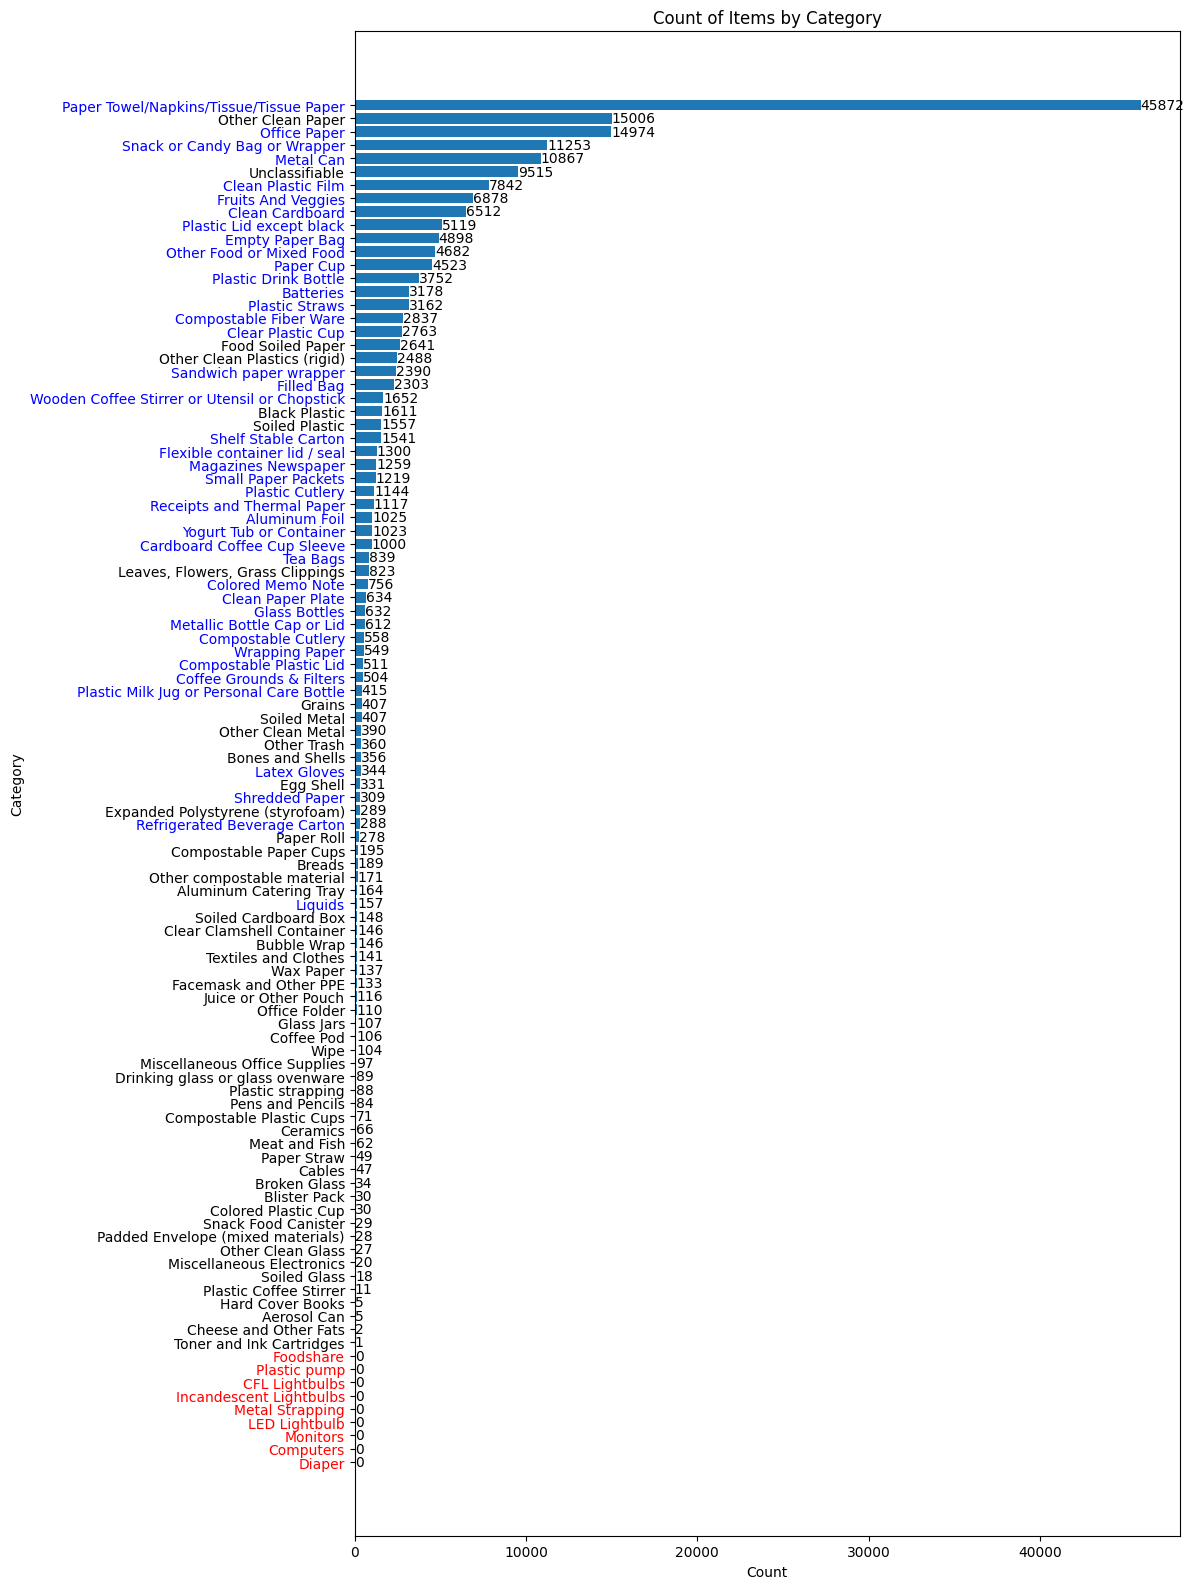

In [7]:
def count_category_occurrences(directory):
    category_counter = Counter()
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            with open(os.path.join(directory, filename), 'r') as f:
                data = json.load(f)
                for annotation in data['annotations']:
                    category_id = annotation['category_id']
                    if category_id in answer_key:
                        category_counter[answer_key[category_id]] += 1
    return category_counter

def plot_category_occurrences(category_counter):
    # Ensure all categories from answer_key are in the counter, even if count is 0
    for category in answer_key.values():
        if category not in category_counter:
            category_counter[category] = 0
    
    focus_categories_names = [answer_key[cat] for cat in focus_categories]
    
    # Sort categories based on their count
    sorted_categories = sorted(category_counter.items(), key=lambda x: x[1])
    sorted_category_names, sorted_counts = zip(*sorted_categories)
    
    plt.figure(figsize=(12, 16))
    bars = plt.barh(sorted_category_names, sorted_counts)
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.title('Count of Items by Category')
    plt.tight_layout()
    
    # Change the color of the y-axis labels to red if the count is 0
    for tick_label, count in zip(plt.gca().get_yticklabels(), sorted_counts):
        if count == 0:
            tick_label.set_color('red')

    for tick_label in plt.gca().get_yticklabels():
        if tick_label.get_text() in focus_categories_names:
            tick_label.set_color('blue')
    
    # Show counts beside each bar
    for bar, count in zip(bars, sorted_counts):
        plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2, str(count), va='center', ha='left')
    
    plt.show()

directory = '/projectnb/ds549/students/ac25/cocojson'
occurrences = count_category_occurrences(directory)
plot_category_occurrences(occurrences)

We can see that there is class imbalance both in the overall dataset and the subset of the categories that we are focusing on. Adressing this class imbalance will likely be a good place to start to improve the segmentation performance. 

We will now turn our attention to the images in the dataset. In order to analyze such a large dataset, we will make use of the cleanvision library which provides out of the box functionality for identifying duplicates, near duplicates, blurry images, and all kinds of other issues which may exist in our dataset. We are enabling multiprocessing here to speed things up, but this can disabled in the code block below.  

Reading images from /projectnb/ds549/students/ac25/images
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


100%|██████████| 18169/18169 [01:52<00:00, 160.87it/s]


Issue checks completed. 447 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | odd_size         |          271 |
|  1 | blurry           |          126 |
|  2 | exact_duplicates |           30 |
|  3 | near_duplicates  |           18 |
|  4 | dark             |            2 |
|  5 | low_information  |            0 |
|  6 | odd_aspect_ratio |            0 |
|  7 | light            |            0 |
|  8 | grayscale        |            0 | 

--------------------- odd_size images ----------------------

Number of examples with this issue: 271
Examples representing most severe instances of this issue:



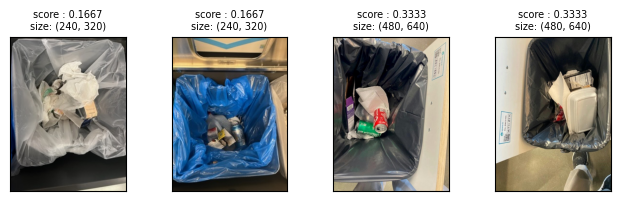

---------------------- blurry images -----------------------

Number of examples with this issue: 126
Examples representing most severe instances of this issue:



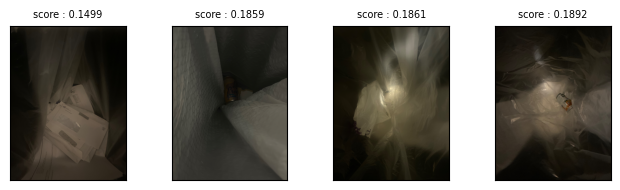

----------------- exact_duplicates images ------------------

Number of examples with this issue: 30
Examples representing most severe instances of this issue:

Set: 0


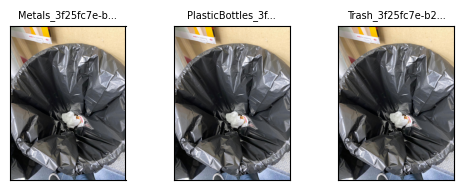

Set: 1


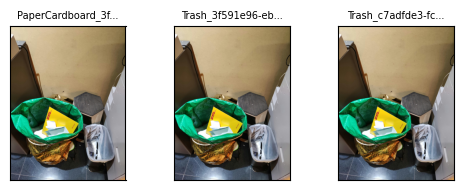

Set: 2


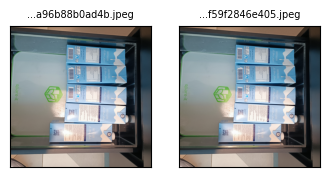

Set: 3


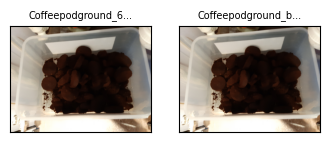

------------------ near_duplicates images ------------------

Number of examples with this issue: 18
Examples representing most severe instances of this issue:

Set: 0


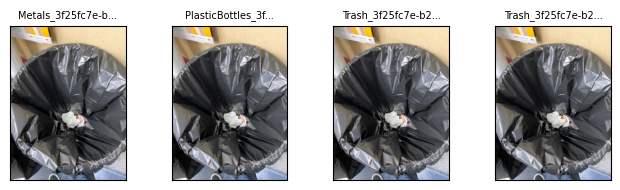

Set: 1


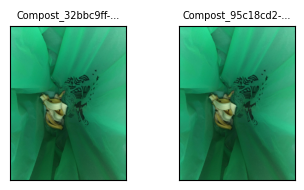

Set: 2


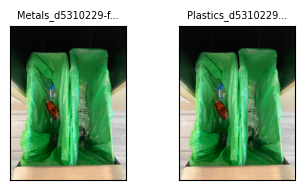

Set: 3


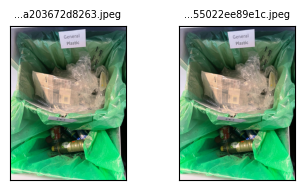

----------------------- dark images ------------------------

Number of examples with this issue: 2
Examples representing most severe instances of this issue:



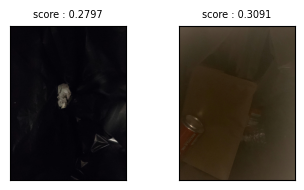

In [9]:
from cleanvision import Imagelab

imagelab = Imagelab(data_path='/projectnb/ds549/students/ac25/images')

#Disable multiprocessing here by setting n_jobs=1
imagelab.find_issues(n_jobs=12)
imagelab.report()

From this comprehensive analysis, we can note several things:

(1) Not all of the images are of the same size. This will likely not be an issue as we can resize to 640 x 640 during training. 

(2) The presence of duplicates in the dataset may be something that we can discuss with the client to understand if this is intentional or not. In any case, this is a small fraction of the dataset.

(3) Blurry and dark images indicate real issues that may make it hard for the model to identify contamination, but once again this is a small fraction of the dataset. 